In [1]:
# Default Libraries
import os
import StringIO

# External Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import FileLink, FileLinks

# Own Libraries
import rstoolbox  # Learn about this library at: http://lpdi-epfl.github.io/RosettaSilentToolbox

import readme

# Global Parameters
plt.rcParams['svg.fonttype'] = 'none'
rstoolbox.utils.format_Ipython()

# Design of a RSVF site II carrier from 1KX8

> This summary does not track all attempts and variations, just the pathway towards obtaining the designs that were experimentally characterized.

In [2]:
# Direct information obtain from scoring 1kx8 with Rosetta
baseline = rstoolbox.io.get_sequence_and_structure(os.path.join('selection', 'baseline', '1kx8.pdb'))
baseline

,score,fa_atr,fa_rep,fa_sol,fa_intra_rep,fa_intra_sol_xover4,lk_ball_wtd,fa_elec,pro_close,hbond_sr_bb,hbond_lr_bb,hbond_bb_sc,hbond_sc,dslf_fa13,omega,fa_dun,p_aa_pp,yhh_planarity,ref,rama_prepro,time,description,sequence_A,structure_A,phi_A,psi_A
0,165.939,-594.399,185.277,426.021,1.376,25.587,-16.933,-141.967,7.165,-50.138,-2.655,-6.671,-6.171,-2.659,0.059,326.333,-8.581,0.0,16.661,7.633,2.0,1kx8_0001,NINLDEILANKRLLVAYVNCVMERGKCSPEGKELKEHLQDAIENGCKKCTENQEKGAYRVIEHLIKNEIEIWRELTAKYDPTGNWRKKYEDRAKAAGIVI,LLLLHHHHHLHHHHHHHHHHHLLLLLLLHHHHHHHHHHHHHHHHLLLLLLHHHHHHHHHHHHHHHHHLHHHHHHHHHHHLLLLLLHHHHHHHHHHHLLLL,"[0.0, -46.7858, -126.674, ...]","[-42.2254, 137.85, -165.222, ...]"


## Making the designs

The construction of the **1kx8**-derived designs implies the grafting to RSVF's site II as represented in [3ixt.pdb](design/3ixt.pdb) without its neutralizing antibody.

The process was performed in a two-generation step.

### Step 1

Site II was grafted into **1kx8** by means of the _NubInitioMover_ and the sequence space after folding was explored with _FastDesign_. All within the RosettaScript [fold_design.xml](design/fold_design.xml) into a [SLURM](https://slurm.schedmd.com/)-based cluster through the submiter script [submit_gen1.sh](design/submit_gen1.sh).

A total of 12483 decoys were generated. The aim of this firts run was to explore and find a folded conformation that would:

* carry and stabilize at backbone level site II.
* fold back to a conformation close to **1kx8** keeping the proper beta pairing.

From all the decoys, [188_1kx8_0033](design/188_1kx8_0033.pdb) was selected as seed for the next step of the process. The values of this decoy in the context of the design population are marked with a red line.

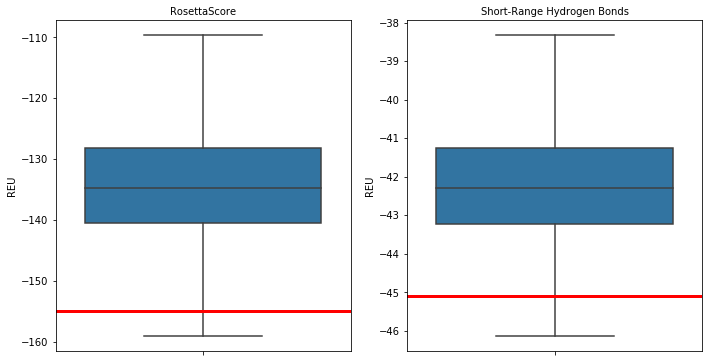

In [3]:
step1 = rstoolbox.io.parse_rosetta_file('design/1kx8_silent.minisilent.gz')
readme.plot_step1(step1)

### Step 2

The second generation derives from [188_1kx8_0033](design/188_1kx8_0033.pdb) and basically runs the same conditions but using this decoy instead of **1kx8** as template.

The executed script is still  [fold_design.xml](design/fold_design.xml), but the submiter script is [submit_gen2.sh](design/submit_gen2.sh).

A total of 12493 decoys were generated.

From all the decoys, the top 500 best scorers were evaluated in terms of packing, BUNS and secondary structure divergence form the starting decoy with the [fastrelax_cav_vol_buns.xml](design/fastrelax_cav_vol_buns.xml) RosettaScript after global relaxation. The six decoys with the best behaviour after evaluating this parameters and some visual inspection became the seed for the seven desings of **generation 1**. The values for those designs are highlighted in the distributions in red.

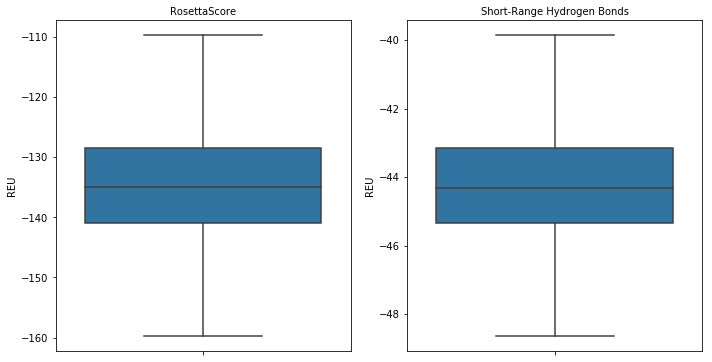

In [4]:
step2 = rstoolbox.io.parse_rosetta_file('design/1kx8_silent2.minisilent.gz')
readme.plot_step2(step2)

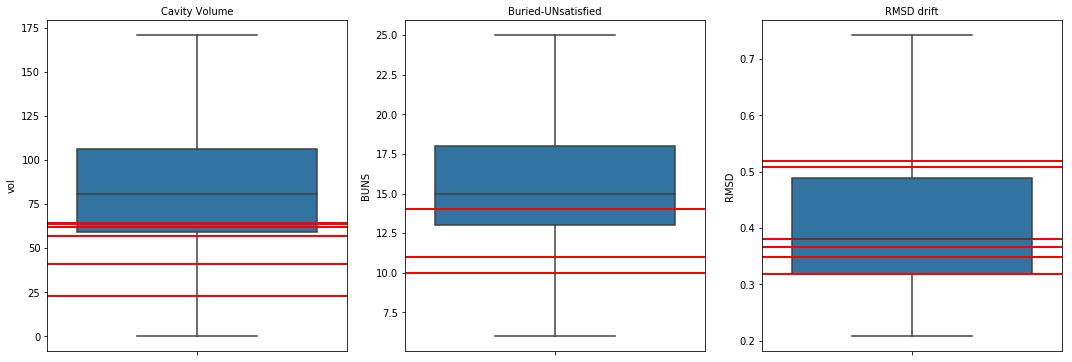

In [5]:
step3 = rstoolbox.io.parse_rosetta_file('design/top500score.silent')
readme.plot_step3(step3)

### Generation 1

The seven designs of **generation 1** derive from the 6 selected from **step 3** after human-guided design (mutations were selected and imposed manually).

### Generation 2

The eight designs of **generation 2** derive from disulfidized versions of **generation 1** with automatic mutations added to fit the disulfides.


Data from those two generations is discussed in the paper.

# Experimental Data

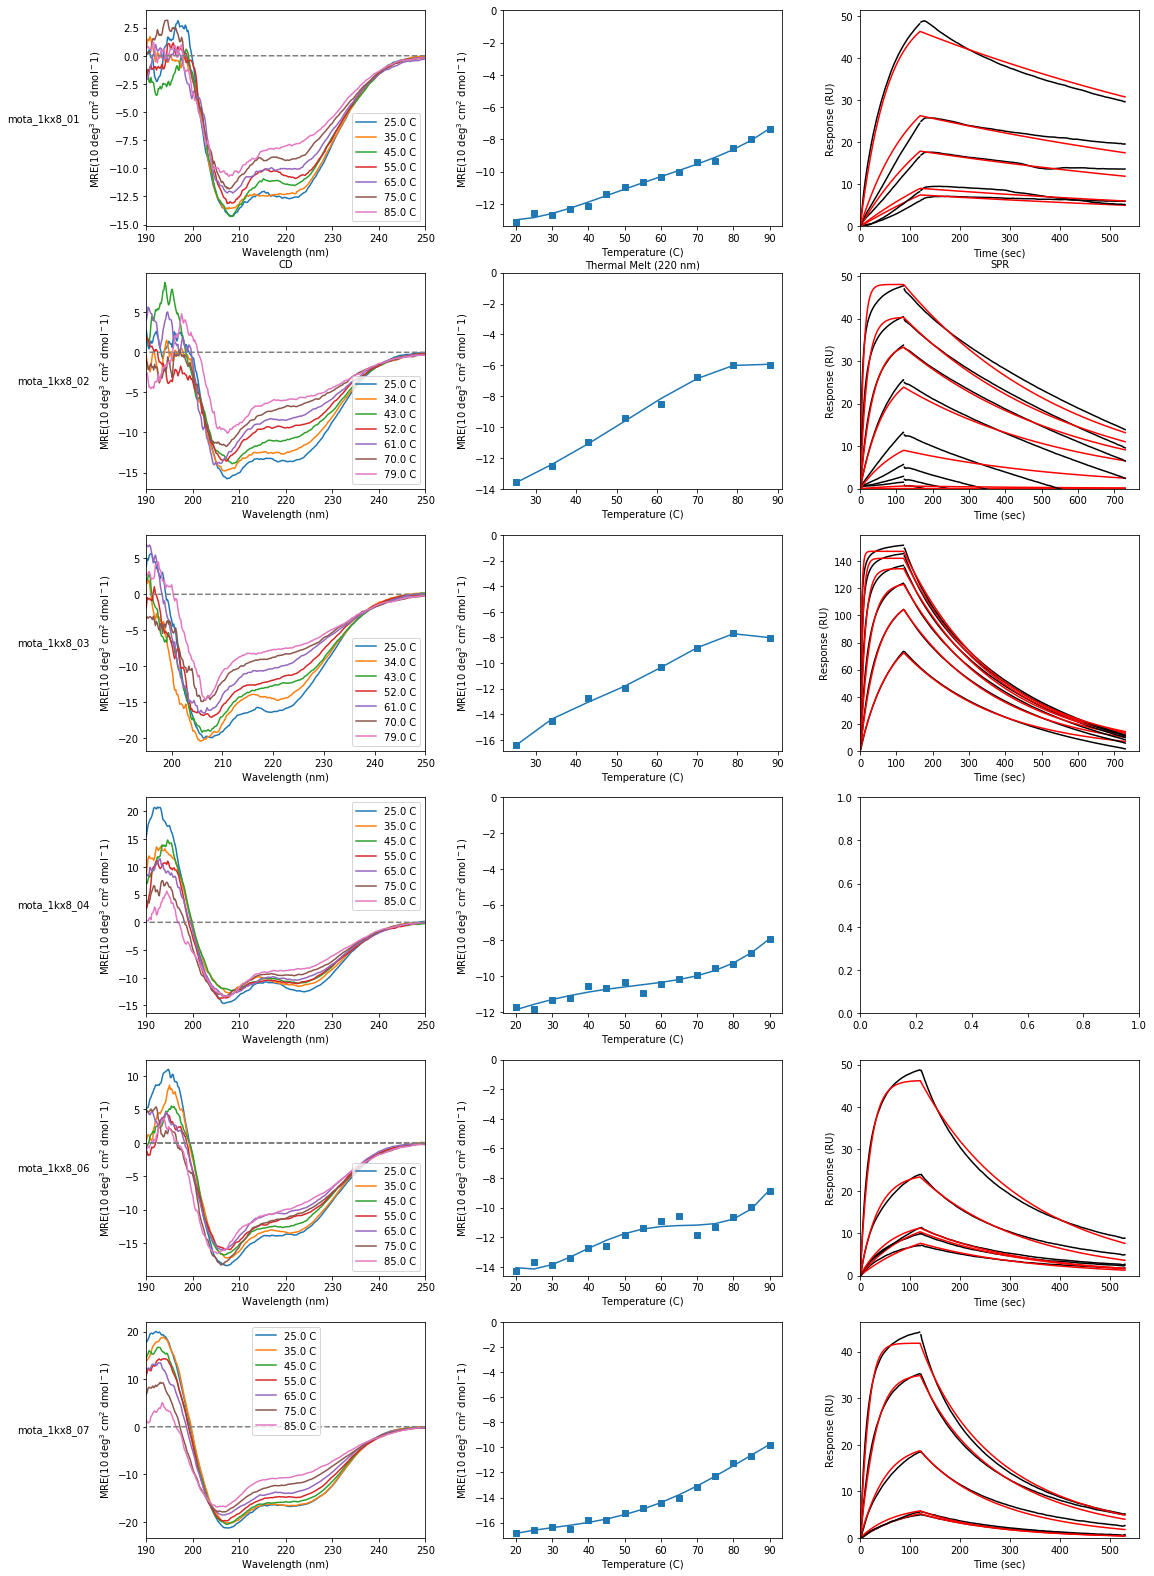

In [6]:
designs = readme.load_experimental()
readme.firstgen_plot(designs)

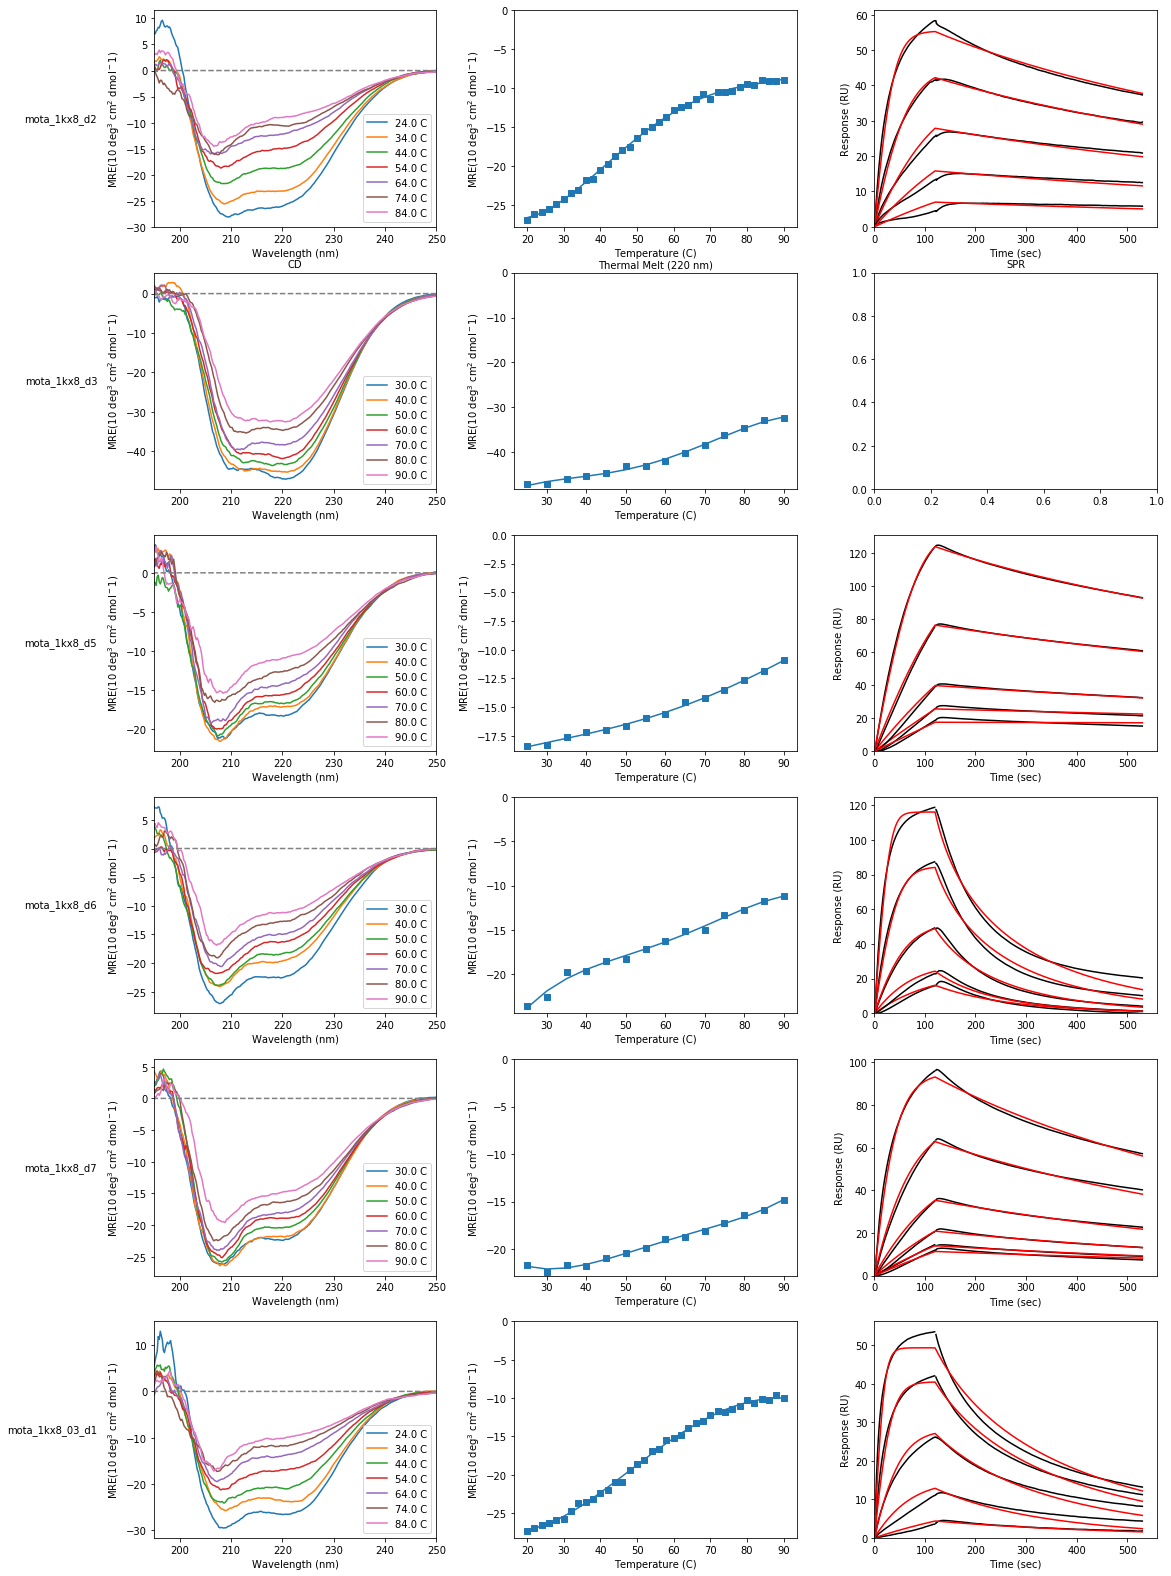

In [7]:
readme.secondgen_plot(designs)